## **Data Analysis for Electronic Sales** ##

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op


In [144]:
# Loading the data set fron the excel sheet
sales= pd.read_excel("electronic_sales.xlsx")

In [145]:
# viewing the dataset
sales

# viewing the data types of each column
sales.dtypes


Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
dtype: object

In [146]:
# renaming the column names to all lower case and replacing space with underscore
e_sales = sales.rename(columns=lambda  x: x.strip().lower().replace(" ", "_"))

# viewing the e_sales data type
e_sales.dtypes

date           datetime64[ns]
branch                 object
sales_agent            object
products               object
units                   int64
price                 float64
dtype: object

In [147]:
# creating the revenue column in the data set
e_sales["revenue"]= e_sales["units"] * e_sales["price"]
e_sales

# displaying the parameter for the revenue column in thousands round(parameter, 2)
e_sales["revenue(₦)"] = round(e_sales["units"]* e_sales["price"] * 1000, 2)
e_sales


,date,branch,sales_agent,products,units,price,revenue,revenue(₦)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0
5,2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0
6,2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0
7,2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0
8,2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0
9,2015-08-07,Woji,Emeka,Dell,42,23.95,1005.90,1005900.0


In [148]:
# converting the date column to datetime

# e_sales["date"]= pd.to_datetime(e_sales["date"])

# extracting the week_day, month and year from the date column
e_sales["year"]= e_sales['date'].dt.year
e_sales["month"] = e_sales["date"].dt.month_name()
e_sales["week_day"] = e_sales["date"].dt.day_name()

e_sales.head()

,date,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


## Working on the KPI's ##

In [149]:
# Total Electronics units sold
total_units_sold = e_sales["units"].sum()
print(f"Total units sold: {total_units_sold}")

Total units sold: 2121


In [150]:
# Total revenue
total_revenue = e_sales["revenue(₦)"].sum()
print(f"The Total Revenue generated from the electronic sales is {total_revenue:,} ")

The Total Revenue generated from the electronic sales is 19,627,880.0 


In [151]:
# Average revenue per unit
# using round() to approximate to 2 decimal places
avrg_revenue_per_unit = round(total_revenue/total_units_sold, 2)
print(f"The Average Revenue generated per unit sale is: ₦{avrg_revenue_per_unit:,}")

The Average Revenue generated per unit sale is: ₦9,254.07


In [152]:
# number of products using nunique() to show the number of unique values
no_of_unique_products  = e_sales["products"].nunique()
print(f"Total Number of Products: {no_of_unique_products}")


# showing the list of unique products using unique()
name_of_products  = e_sales["products"].unique()
print(f"Name of Products: {name_of_products}")



Total Number of Products: 5
Name of Products: ['Apple' 'Lenovo' 'HP' 'Compaq' 'Dell']


In [153]:
# number of Sales Agents using nunique()
no_of_sales_agent  = e_sales["sales_agent"].nunique()
print(f"Total Number of Sales Agents: {no_of_sales_agent}")


# showing the list of sales agents names
name_of_sales_agent  = e_sales["sales_agent"].unique()
print(f"Names of Sales Agents: {name_of_sales_agent}")

Total Number of Sales Agents: 11
Names of Sales Agents: ['Chinedu' 'Emeka' 'Ibrahim' 'Tolu' 'Tonye' 'George' 'Blessing' 'Chioma'
 'Torbari' 'Uche' 'Tunde']


## Work on the Insight by creating models and plotting their charts ##

In [154]:
# using the date columns as the index
e_sales.set_index("date", inplace=True)
e_sales

,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0,2014,October,Sunday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0,2014,February,Sunday


In [155]:
# number of unique Year(s) in the data set
e_sales.year.unique()



array([2014, 2015], dtype=int32)

In [156]:
# display the sales for 2014 only
e_sales_2014 = e_sales[e_sales["year"] == 2014]
e_sales_2014

,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0,2014,October,Sunday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0,2014,February,Sunday
2014-01-23,Woji,Emeka,HP,50,19.99,999.50,999500.0,2014,January,Thursday
2014-12-12,Woji,Chinedu,Lenovo,67,1.29,86.43,86430.0,2014,December,Friday
2014-04-18,Woji,Tonye,Lenovo,75,1.99,149.25,149250.0,2014,April,Friday
2014-05-05,Woji,Tolu,Lenovo,90,4.99,449.10,449100.0,2014,May,Monday
2014-06-25,Woji,George,Lenovo,90,4.99,449.10,449100.0,2014,June,Wednesday


In [157]:
# display the sales for 2015 only
e_sales_2015 = e_sales[e_sales["year"] == 2015]
e_sales_2015

,branch,sales_agent,products,units,price,revenue,revenue(₦),year,month,week_day
date,,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday
2015-08-07,Woji,Emeka,Dell,42,23.95,1005.90,1005900.0,2015,August,Friday
2015-01-15,Woji,Ibrahim,HP,46,8.99,413.54,413540.0,2015,January,Thursday
2015-03-24,Woji,Tolu,Dell,50,4.99,249.50,249500.0,2015,March,Tuesday
2015-05-14,Woji,Ibrahim,Lenovo,53,1.29,68.37,68370.0,2015,May,Thursday


**Calculating the Total Monthly revenue for year 2014**

In [158]:
# using .sortindex() to arrange the ouput based on the index
total_monthly_revenue_2014 = e_sales_2014.groupby("month")["revenue(₦)"].sum().sort_index()
total_monthly_revenue_2014 

month
April         448650.0
August        174650.0
December     1269690.0
February      719370.0
January      1188550.0
July         1676900.0
June          988500.0
March         167440.0
May           512780.0
November      778890.0
October       827080.0
September     505840.0
Name: revenue(₦), dtype: float64

In [159]:
# using .sortindex() to arrange the ouput based on the index
total_monthly_revenue_2015 = e_sales_2015.groupby("month")["revenue(₦)"].sum().sort_index()
total_monthly_revenue_2015 

month
April         610380.0
August       1830900.0
December     2018780.0
February     1324960.0
January       413540.0
July          996330.0
June          625000.0
March         389430.0
May           787570.0
November       54890.0
October      1157490.0
September     160270.0
Name: revenue(₦), dtype: float64

In [160]:
# using sort.values() to arrange the output based on the values for 2014 (low to high)
total_monthly_revenue_2014= e_sales_2014.groupby("month")["revenue(₦)"].sum().sort_values(ascending = True)
print(f"Total Monthly Revenue for 2014 in ascending order: \n, total_monthly_revenue_2014")


Total Monthly Revenue for 2014 in ascending order: 
, total_monthly_revenue_2014


In [161]:
# using sort.values() to arrange the output based on the values for 2015 (low to high)
total_monthly_revenue_2015= e_sales_2015.groupby("month")["revenue(₦)"].sum().sort_values(ascending = True)
print("Total Monthly Revenue for 2015 in ascending order: \n", total_monthly_revenue_2015)

Total Monthly Revenue for 2015 in ascending order: 
 month
November       54890.0
September     160270.0
March         389430.0
January       413540.0
April         610380.0
June          625000.0
May           787570.0
July          996330.0
October      1157490.0
February     1324960.0
August       1830900.0
December     2018780.0
Name: revenue(₦), dtype: float64


<Axes: xlabel='Month', ylabel='revenue(₦)'>

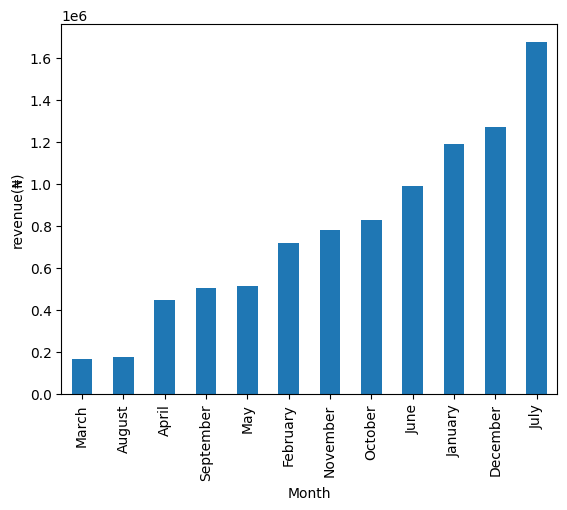

In [162]:
# plotting the chart for 2014 using bar chart in pandas
total_monthly_revenue_2014.plot(kind="bar", xlabel="Month", ylabel="revenue(₦)")

<Axes: xlabel='Month', ylabel='revenue(₦)'>

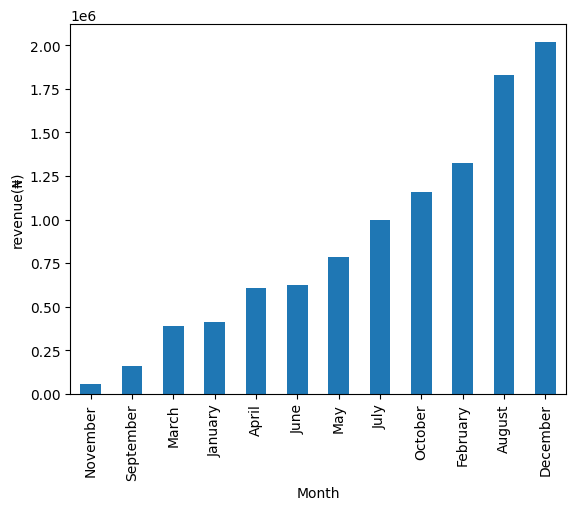

In [163]:
# plotting the chart for 2015 using bar chart in pandas
total_monthly_revenue_2015.plot(kind="bar", xlabel="Month", ylabel="revenue(₦)")

In [164]:
# using .sort_value() to to arrange the output based on the values for the 20i4 and 2015
total_revenue= e_sales.groupby("year")['revenue(₦)'].sum().sort_values(ascending=True)
total_revenue

year
2014     9258340.0
2015    10369540.0
Name: revenue(₦), dtype: float64

<Axes: ylabel='revenue(₦)'>

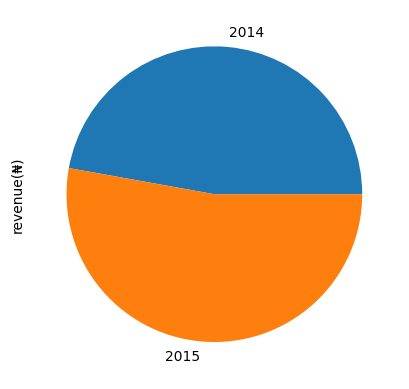

In [ ]:
# plotting the pie chart for the total revenue using pandas
total_revenue.plot(kind = "pie")

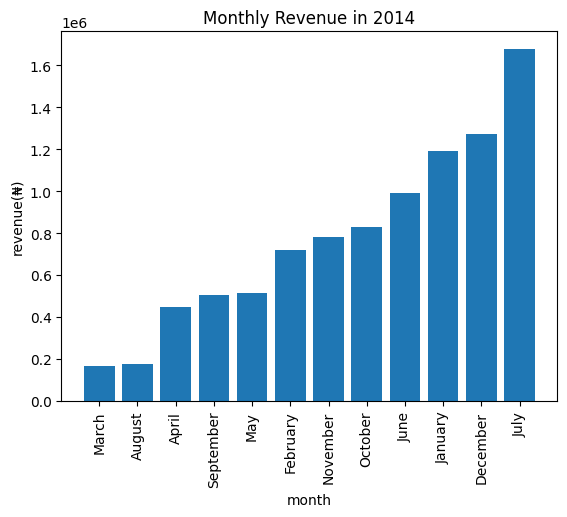

In [ ]:
# plotting the chart for 2014 using matplotlib
plt.bar(total_monthly_revenue_2014.index, total_monthly_revenue_2014.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Monthly Revenue in 2014")
plt.xticks(rotation = 90)
plt.show()

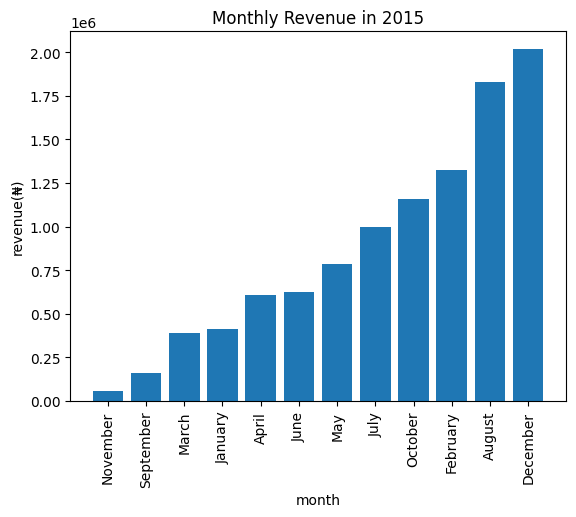

In [ ]:
# plotting the chart for 2015 using matplotlib
plt.bar(total_monthly_revenue_2015.index, total_monthly_revenue_2015.values)
plt.xlabel("month")
plt.ylabel("revenue(₦)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 90)
plt.show()

Total Revenue by Branch